In [2]:
import numpy as np
import cv2 as cv
import pandas as pd
import os
from glob import glob
from matplotlib import pyplot as plt

from utpnerves.preprocessing import proceso
from utpnerves.preprocessing import unet

def viz(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')

In [3]:
list_imgs = glob('/content/python-utpnerves/python-utpnerves.preprocessing-main/docs/source/notebooks/assets/imgs/*.jpg')
list_imgs

['/content/python-utpnerves/python-utpnerves.preprocessing-main/docs/source/notebooks/assets/imgs/CPD09042021001_t_26_4.jpg',
 '/content/python-utpnerves/python-utpnerves.preprocessing-main/docs/source/notebooks/assets/imgs/CPD09042021001__20aguja_t_21_4.jpg',
 '/content/python-utpnerves/python-utpnerves.preprocessing-main/docs/source/notebooks/assets/imgs/CPD09042021002_t_51_85.jpg',
 '/content/python-utpnerves/python-utpnerves.preprocessing-main/docs/source/notebooks/assets/imgs/CPD09042021002_t_23_9.jpg',
 '/content/python-utpnerves/python-utpnerves.preprocessing-main/docs/source/notebooks/assets/imgs/CPD09042021001_t_41_9.jpg']

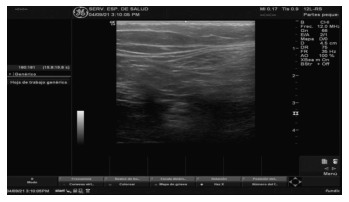

In [4]:
img_path = np.random.choice(list_imgs)
img_array = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
viz(img_array)

In [5]:
p = proceso()
u = unet()

modelo = u.unet()
# Cargar los pesos pre-entrenados del modelo
modelo.load_weights(os.path.join('assets', 'models', 'pesosBalanceBlancos.h5'))
# Procesar la imagen-array
img_process = p.imagen_proceso(img_array)
# Pasar la imagen procesada a la etapa de inferencia
prediccion = modelo.predict(img_process)
# Limitar la predicción
aux = prediccion < 1.0
prediccion[aux] = 0
# Pasar de un tensor-imagen a una imagen que se pueda mostrar
prediccion = prediccion[0, :, :, 0]
# Eliminar areas pequeñas de la imagen
img_areas_remove = p.remover_areas(prediccion)
# Redondear los valores del preproces anterior
img_round = np.round(p.aumento_tam(img_areas_remove, img_array.shape))
# Calcular el rectángulo que encierra la predicción
mask_rectangle = p.cuadrar_rect(img_round)
# cinfigurar el rectangulo como una imagen
final_image = p.dim_rec(mask_rectangle, img_array)  # nos interesa esta
# Multiplicar el rectángulo con la imagen original



1/1 [==============================] - 1s 607ms/step


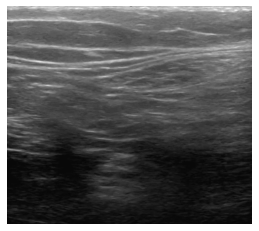

In [6]:
viz(final_image)